---
# Project 2 : Ames Housing Data and Kaggle Challenge

---
## Part I. Data Cleaning & EDA
---

### Problem Statement

Are certain housing features associated with higher sales prices? Are the main drivers of housing prices structural and difficult to change, or are there certain features a homeowner can change to add to increase the price of a house? 


In [1]:
# Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in Data.
df = pd.read_csv('../datasets/train.csv')
test_df = pd.read_csv ('../datasets/test.csv')

In [3]:
# Initial look at Data. Examining for nulls and datatypes.
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
# Rename columns, making all lower case and replacing spaces with underscores.
df.columns = [column.replace(' ', '_').lower() for column in df.columns]
test_df.columns = [column.replace(' ', '_').lower() for column in test_df.columns]

#### Replacing Null Values:
* Went through columns and replaced null values with appropriate values.
* Since the data set is not very large, filled null values with either the category associated with none of the feature (as described in the data dictionary), or the value of 0 when appropriate (i.e. for basement square feet, 'NA' means no basement so replaced with 0). 
* For year built, replaced the null values with the mean of the years built, since a year of 0 would make no sense.

In [6]:
# Replace null values in columns with 0.
df['lot_frontage'] = df['lot_frontage'].fillna(0)
df['bsmtfin_sf_1'] = df['bsmtfin_sf_1'].fillna(0)
df['bsmtfin_sf_2'] = df['bsmtfin_sf_2'].fillna(0)
df['bsmt_unf_sf'] = df['bsmt_unf_sf'].fillna(0)
df['total_bsmt_sf'] = df['total_bsmt_sf'].fillna(0)
df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(0.0)
df['bsmt_half_bath'] = df['bsmt_half_bath'].fillna(0.0)
df['garage_cars'] = df['garage_cars'].fillna(0.0)
df['garage_area'] = df['garage_area'].fillna(0)

# Replace null values with categorical 'no'.
df['alley'] = df['alley'].fillna('No Alley')
df['mas_vnr_type']= df['mas_vnr_type'].fillna('None')
df['bsmt_qual'] = df['bsmt_qual'].fillna('Nb')
df['bsmt_cond'] = df['bsmt_cond'].fillna('Nb')
df['bsmt_exposure'] = df['bsmt_exposure'].fillna('Nb')
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].fillna('Nb')
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].fillna('Nb')
df['fireplace_qu'] = df['fireplace_qu'].fillna('Nf')
df['garage_type'] = df['garage_type'].fillna('Ng')
df['garage_finish'] = df['garage_finish'].fillna('Ng')
df['garage_qual'] = df['garage_qual'].fillna('Ng')
df['garage_cond'] = df['garage_cond'].fillna('Ng')
df['fence'] = df['fence'].fillna('Nf')
df['misc_feature'] = df['misc_feature'].fillna('None')
df['pool_qc'] = df['pool_qc'].fillna('Np')

# Fill garage year built with median for the column.
df['garage_yr_blt'].median()
df['garage_yr_blt'] = df['garage_yr_blt'].fillna(1980)

In [7]:
# check - see no more null values.
df.isnull().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 81, dtype: int64

In [8]:
# Clean test data, following identical methodology as above.
test_df['lot_frontage'] = test_df['lot_frontage'].fillna(0)
test_df['bsmtfin_sf_1'] = test_df['bsmtfin_sf_1'].fillna(0)
test_df['bsmtfin_sf_2'] = test_df['bsmtfin_sf_2'].fillna(0)
test_df['bsmt_unf_sf'] = test_df['bsmt_unf_sf'].fillna(0)
test_df['total_bsmt_sf'] = test_df['total_bsmt_sf'].fillna(0)
test_df['bsmt_full_bath'] = test_df['bsmt_full_bath'].fillna(0.0)
test_df['bsmt_half_bath'] = test_df['bsmt_half_bath'].fillna(0.0)
test_df['garage_cars'] = test_df['garage_cars'].fillna(0.0)
test_df['garage_area'] = test_df['garage_area'].fillna(0)

test_df['alley'] = test_df['alley'].fillna('No Alley')
test_df['mas_vnr_type']= test_df['mas_vnr_type'].fillna('None')
test_df['bsmt_qual'] = test_df['bsmt_qual'].fillna('Nb')
test_df['bsmt_cond'] = test_df['bsmt_cond'].fillna('Nb')
test_df['bsmt_exposure'] = test_df['bsmt_exposure'].fillna('Nb')
test_df['bsmtfin_type_1'] = test_df['bsmtfin_type_1'].fillna('Nb')
test_df['bsmtfin_type_2'] = test_df['bsmtfin_type_2'].fillna('Nb')
test_df['fireplace_qu'] = test_df['fireplace_qu'].fillna('Nb')
test_df['garage_type'] = test_df['garage_type'].fillna('Ng')
test_df['garage_finish'] = test_df['garage_finish'].fillna('Ng')
test_df['garage_qual'] = test_df['garage_qual'].fillna('Ng')
test_df['garage_cond'] = test_df['garage_cond'].fillna('Ng')
test_df['pool_qc'] = test_df['pool_qc'].fillna('Np')
test_df['fence'] = test_df['fence'].fillna('Nf')
test_df['misc_feature'] = test_df['misc_feature'].fillna('None')

test_df['garage_yr_blt'] = test_df['garage_yr_blt'].fillna(1980)

# Check that all nulls filled.
test_df.isnull().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
misc_feature    0
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
Length: 80, dtype: int64

In [10]:
# Save 'clean' train and testing data.
clean_df = df.to_csv('../datasets/train_clean.csv', index = False)
clean_test_df = test_df.to_csv('../datasets/test_clean.csv', index = False)

### Examining the target variable: 'Sale Price'

In [11]:
df['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

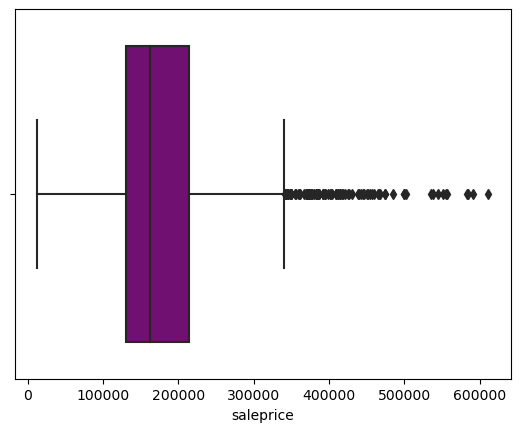

In [12]:
sns.boxplot(x = df['saleprice'], color = 'purple');

Sales Price distribution:

* Examining sale price's box plot and histogram, it is clear sale price data is right skewed.
* Can also see that there are numerous outliers 2-3 times the mean price.
* With a minimum price of 12,789 dollars and a maximum price of 611,657 dollars, although the range is large, since the data set is relatively small in terms of how many observations (2051 houses), will be including outliers.
* Furthermore, since my problem statement involves identifying features that are associated with higher house prices, including most expensive homes is imperative.

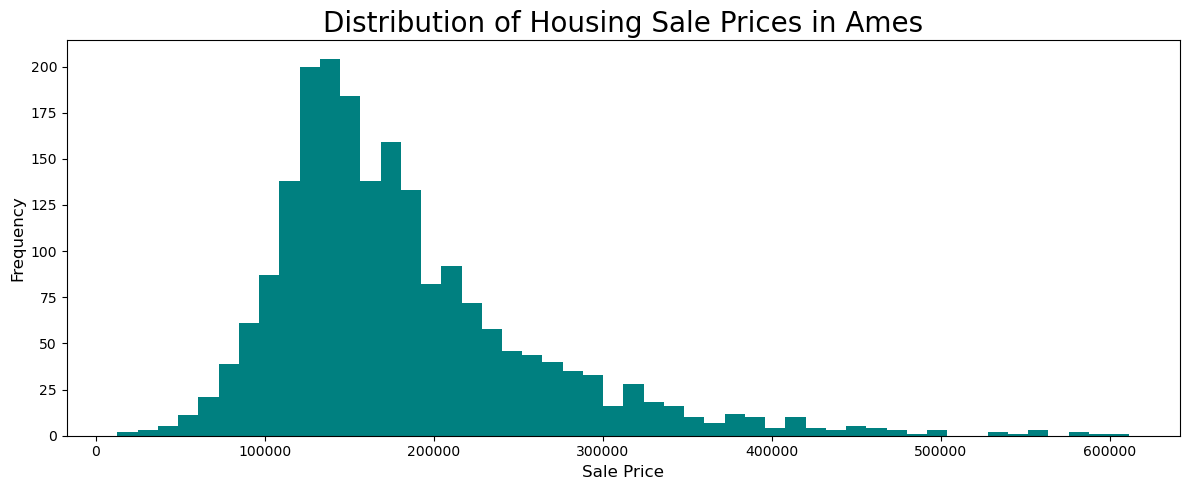

In [14]:
# Create and save Histogram of Sale Price Distribution.

# Plot.
plt.figure(figsize = (12, 5))
plt.hist(df['saleprice'],
        color = 'teal', bins = 50)

# Add titles.
plt.title('Distribution of Housing Sale Prices in Ames', size = 20);
plt.xlabel('Sale Price', size = 12)
plt.ylabel('Frequency', size = 12);

# Save as image.
plt.tight_layout()
plt.savefig('../images/sale_price_hist.png');

### Correlation Between Features and Target Variable

Start by getting correlations between numeric variables and sale price.

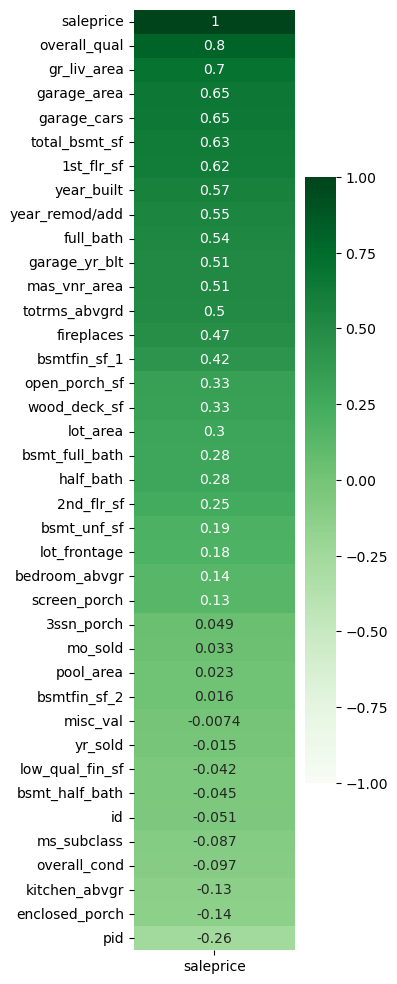

In [15]:
#Correlation heat map
corr = df.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False)

plt.figure(figsize = (4, 10))

sns.heatmap(corr,
           cmap = 'Greens',
           annot = True,
           vmin = -1,
           vmax = 1);

# Save as image.
plt.tight_layout()
plt.savefig('../images/heatmap.png');

According to this heat map, the top three most correlated features are :
1. Overall quality of the house
2. The square footage/size of the living area above ground
3. The square footage/size of the garage

The scatter plots below suggest a linear relationship. 

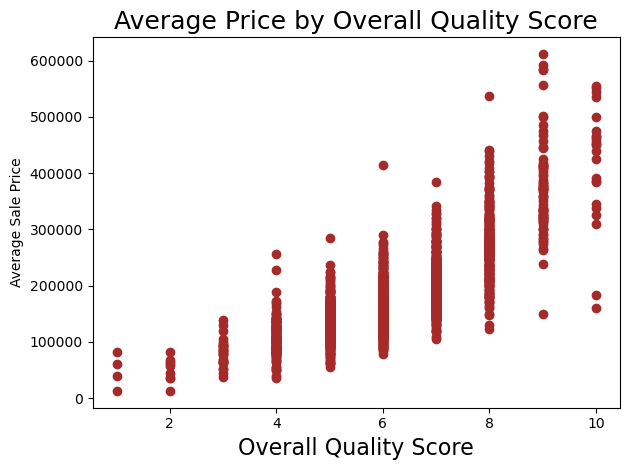

In [17]:
# Overall quality
plt.scatter(df['overall_qual'], df['saleprice'], color = 'brown');
plt.title("Average Price by Overall Quality Score", size = 18);
plt.xlabel('Overall Quality Score', size = 16);
plt.ylabel('Average Sale Price');

plt.tight_layout()
plt.savefig('../images/quality_scatter.png');

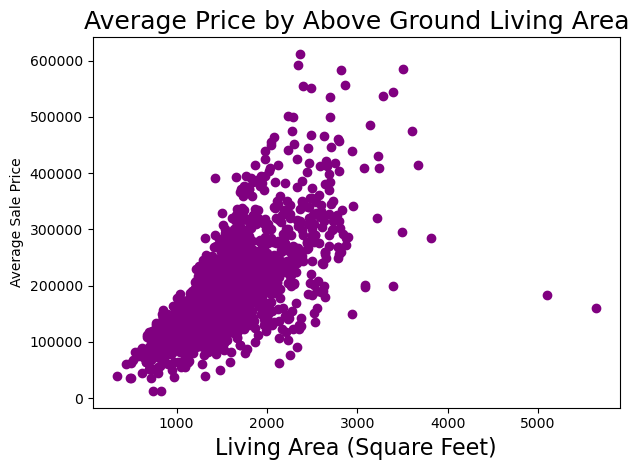

In [18]:
# gr_liv_area  

plt.scatter(df['gr_liv_area'], df['saleprice'], color = 'purple');
plt.title("Average Price by Above Ground Living Area", size = 18);
plt.xlabel('Living Area (Square Feet)', size = 16);
plt.ylabel('Average Sale Price');

plt.tight_layout()
plt.savefig('../images/living_area_scatter.png');

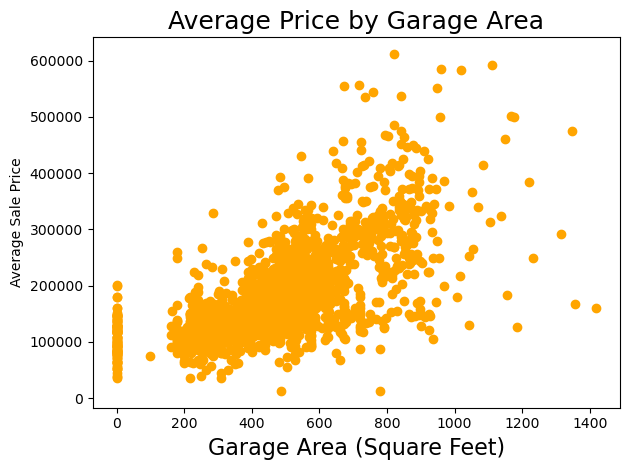

In [19]:
# garage area
plt.scatter(df['garage_area'], df['saleprice'] , color = 'orange');
plt.title("Average Price by Garage Area", size = 18);
plt.xlabel('Garage Area (Square Feet)', size = 16);
plt.ylabel('Average Sale Price');

plt.tight_layout()
plt.savefig('../images/garage_area_scatter.png');

#### Examining Categorical Variables 

The three numeric features above, along with other features which are numeric and correlated with Sale Price according to the heat map will be included in the regression model, while examining categorical features will help inform which categorical variables ought to be categorized (which is done in the second notebook of this project).

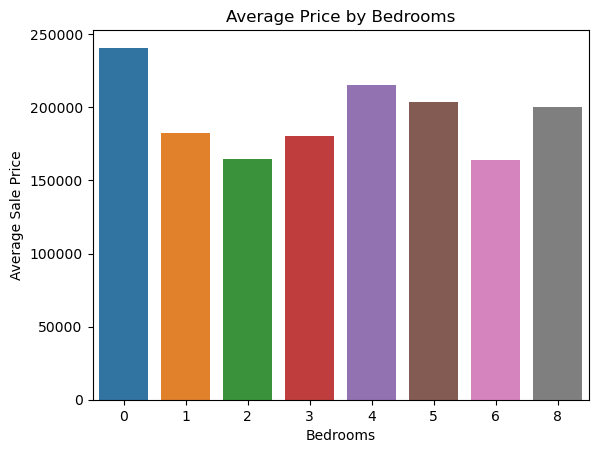

In [139]:
# Number of Bedrooms vs. Sale Price Bargraph.
# bedroom_abvgr
price_by_bedrooms = df.groupby(by='bedroom_abvgr').mean()['saleprice']


sns.barplot(x=price_by_bedrooms.index,
            y=price_by_bedrooms.values,
            order=price_by_bedrooms.index)
plt.title("Average Price by Bedrooms");
plt.xlabel('Bedrooms');
plt.ylabel('Average Sale Price');

# Code inspired by code used in data visualization lesson.

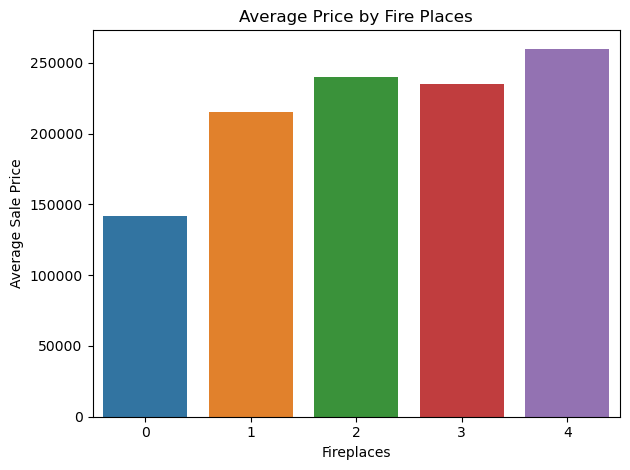

In [20]:
# Number of Fireplaces vs. Sale Price
price_by_fireplace = df.groupby(by='fireplaces').mean()['saleprice']


sns.barplot(x=price_by_fireplace.index,
            y=price_by_fireplace.values,
            order=price_by_fireplace.index)
plt.title("Average Price by Fire Places");
plt.xlabel('Fireplaces');
plt.ylabel('Average Sale Price');

# Save as image.
plt.tight_layout()
plt.savefig('../images/fireplace_bar.png');

Interesting to note that price seems to increase with each fireplace, particularly going from 0 to 1, with the subsequent additional fireplace seemingly causing a less significant increase in mean price.

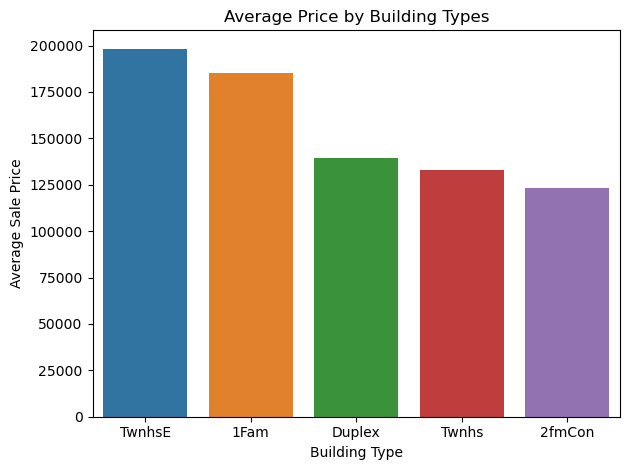

In [22]:
# Building type vs. Sale Price.
price_by_type = df.groupby(by='bldg_type').mean()['saleprice'].sort_values(ascending = False)

sns.barplot(x=price_by_type.index,
            y=price_by_type.values,
            order=price_by_type.index)
plt.title("Average Price by Building Types");
plt.xlabel('Building Type');
plt.ylabel('Average Sale Price');

# Save as image.
plt.tight_layout()
plt.savefig('../images/bldg_type_bar.png');

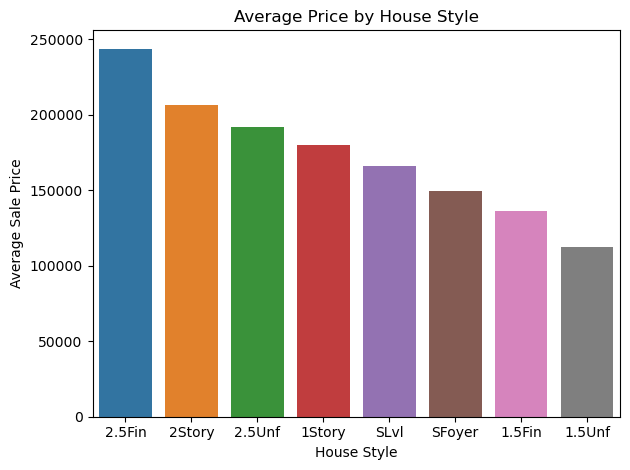

In [25]:
# House Style vs. Sale Price.
price_by_style = df.groupby(by='house_style').mean()['saleprice'].sort_values(ascending=False)

sns.barplot(x=price_by_style.index,
            y=price_by_style.values,
            order=price_by_style.index)
plt.title("Average Price by House Style");
plt.xlabel('House Style');
plt.ylabel('Average Sale Price');

# Save as image.
plt.tight_layout()
plt.savefig('../images/house_style_bar.png');

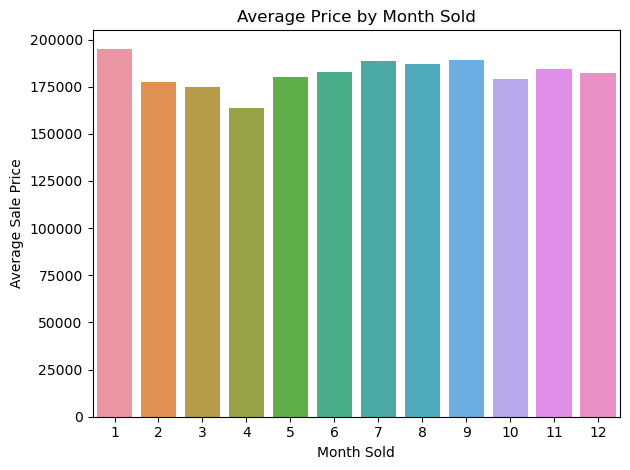

In [24]:
# Month Sold
price_by_month = df.groupby(by='mo_sold').mean()['saleprice']

sns.barplot(x=price_by_month.index,
            y=price_by_month.values,
            order=price_by_month.index)
plt.title("Average Price by Month Sold");
plt.xlabel('Month Sold');
plt.ylabel('Average Sale Price');

# Save plot as image.
plt.tight_layout()
plt.savefig('../images/month_bar.png');

Out of the categorical variables examined, will be exploring housing styles and building types as the bars in the bar chart suggest some sort of association with sale price. Will not be looking at month sold, although it is interesting that April is associated with the lowest mean sale price, while sales made in January tend to sell at a higher price.